# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [1]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [2]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


Split data into a training and test set to evaluate model performance.

In [3]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

In [4]:
import joblib

joblib.dump(X_test, "X_test.pkl")
joblib.dump(y_test, "y_test.pkl")

['y_test.pkl']

# Your Work

## Data Exploration

In [5]:
# Find data types and number of null entries
X.info()
y.info()

# Find number of categorical levels in categorical features
X.select_dtypes(include=['object']).nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.1+ MB
<class 'pandas.core.series.Series'>
RangeIndex: 18442 entries, 0 to 18441
Series name: Recommended IND
Non-Null Count  Dtype
--------------  -----
18442 non-null  int64
dtypes: int64(1)
memory usage: 144.2 KB


Title              13142
Review Text        18439
Division Name          2
Department Name        6
Class Name            14
dtype: int64

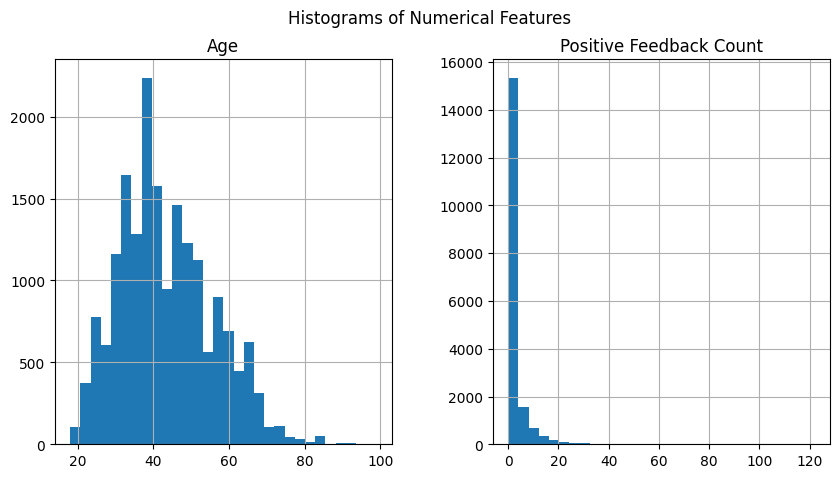

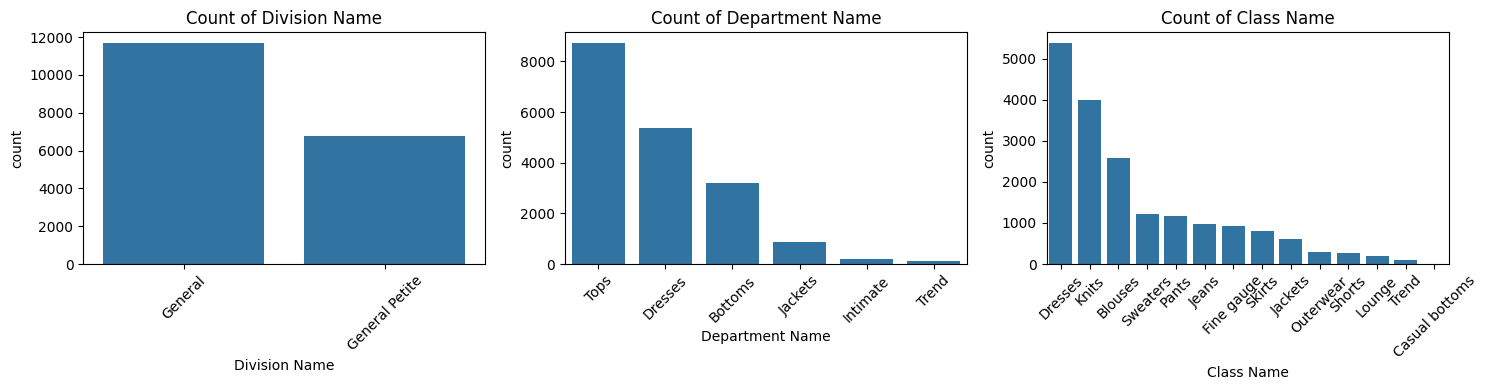

In [6]:
# Plot histograms for numerical features
import seaborn as sns
import matplotlib.pyplot as plt
numerical_features = ['Age', 'Positive Feedback Count']
df[numerical_features].hist(bins=30, figsize=(10, 5))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Plot bar plots for categorical features
categorical_features = ['Division Name', 'Department Name', 'Class Name']
plt.figure(figsize=(15, 4))
for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

- Age appears approximately normally distributed (bell curve). 
- Positive feedback count is right skewed (none or few customers also found the review to be positive).
- Two levels of division name - considerably more 'General' than 'General Petite'.
- 6 levels of Department name, with highest count for 'Tops' and lowest for 'Trend'.
- 14 levels of Class Name, with dresses having the highest count and casual bottoms the lowest.


## Building Pipeline

In [7]:
# Only need to run this once
# ! python -m spacy download en_core_web_sm

In [8]:
import spacy

# Load English tokenizer, tagger, parser, NER and POS tagger

nlp = spacy.load("en_core_web_sm") 

### Splitting data into numerical, categorical and text data

In [9]:
# Import necessary library to create a pipeline
from sklearn.pipeline import Pipeline

Define numerical, categorical and text features.

In [10]:
num_features = (
    X
    .select_dtypes(include=['int64', 'float64']).columns
    .drop(
        [
            'Clothing ID', # Treat Clothing ID as a categorical variable
        ],
    )
)

print('Numerical features are:', num_features)

cat_features = (
    X.select_dtypes(include=['object']).columns
    .drop(
        [
            'Title',
            'Review Text',
        ],
    )
    .append(pd.Index(['Clothing ID']))  # Treat Clothing ID as a categorical variable
)

print('Categorical features are:', cat_features)

text_features = (
    X[['Title', 'Review Text']].columns
)

print('Text features are:', text_features)


Numerical features are: Index(['Age', 'Positive Feedback Count'], dtype='object')
Categorical features are: Index(['Division Name', 'Department Name', 'Class Name', 'Clothing ID'], dtype='object')
Text features are: Index(['Title', 'Review Text'], dtype='object')


### Define a Numerical Features Pipeline

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

# Use ColumnTransformer to apply different scalers to age (approximately normally distributed)
# and positive feedback count (skewed distribution)

num_transformer = ColumnTransformer([
    ('age_scaler', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), ['Age']),
    ('feedback_scaler', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', MinMaxScaler())
    ]), ['Positive Feedback Count'])
])

num_transformer

,transformers,"[('age_scaler', ...), ('feedback_scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


### Define a Categorical Features Pipeline

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

cat_pipeline = Pipeline([
    ('ordinal_encoder',
     OrdinalEncoder(
         handle_unknown='use_encoded_value',
         unknown_value=-1,
     )
     ),
    (
        'imputer',
        SimpleImputer(
            strategy='most_frequent',
        )
    ),
    (
        'cat_encoder',
        OneHotEncoder(
            sparse_output=False,
            handle_unknown='ignore',
        )
    ),
])

cat_pipeline

,steps,"[('ordinal_encoder', ...), ('imputer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,categories,'auto'
,dtype,<class 'numpy.float64'>
,handle_unknown,'use_encoded_value'
,unknown_value,-1
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


### Define a Text Features Pipeline

In [13]:
from custom_transformers import CharCountTransformer

Using this custom transformer to count the number of spaces, exclamations and question marks in the text after ensuring text is in the correct format through preprocessing.

In [14]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
import numpy as np

initial_text_preprocessor = Pipeline([
    (
        'dimension_reshaper',
        FunctionTransformer(
            np.reshape,
            kw_args = {'newshape':-1},
        ),
    ),
])

In [15]:
# Pipeline for counting the number of spaces, exclamations and question marks.

counting_pipeline = FeatureUnion([
    ('count_spaces', CharCountTransformer(' ')),
    ('count_exclamations', CharCountTransformer('!')),
    ('count_questions', CharCountTransformer('?')),
])

character_counts_pipeline = Pipeline([
    (
        'initial_text_preprocessor',
        initial_text_preprocessor
    ),
    (
        'char_counting',
        counting_pipeline
    ),
])

character_counts_pipeline

,steps,"[('initial_text_preprocessor', ...), ('char_counting', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('dimension_reshaper', ...)]"
,transform_input,None
,memory,None
,verbose,False
,func,<function res...001A3D0790870>
,inverse_func,None
,validate,False


We shall now employ TF-IDF to vectorize the review text. Before doing so, we will lemmatize the text:

In [16]:
import spacy
from custom_transformers import SpacyLemmatizer

nlp = spacy.load("en_core_web_sm")
lemmatizer = SpacyLemmatizer(nlp=nlp)

Create TF-IDF pipeline:

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_pipeline = Pipeline([
    (
        'dimension_reshaper',
        FunctionTransformer(
            np.reshape,
            kw_args={'newshape': -1},
        ),
    ),
    (
        'lemmatizer',
        lemmatizer,
    ),
    (
        'tfidf_vectorizer',
        TfidfVectorizer(
            stop_words='english',
        ),
    ),
])

tfidf_pipeline

,steps,"[('dimension_reshaper', ...), ('lemmatizer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,func,<function res...001A3D0790870>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,{'newshape': -1}


### Combine all the feature engineering pipelines into one.

In [18]:
from sklearn.compose import ColumnTransformer

feature_engineering = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_pipeline, cat_features),
    ('title_character_counts', character_counts_pipeline, ['Title']),
    ('review_character_counts', character_counts_pipeline, ['Review Text']),
    ('title_tfidf', tfidf_pipeline, ['Title']),
    ('review_tfidf', tfidf_pipeline, ['Review Text']),
])

feature_engineering

,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


Check sparsity of transformed data by running feature engineering pipeline on training set and inspecting the output.

In [19]:
# # Transform the training data
# X_transformed = feature_engineering.fit_transform(X_train)

# # If output is a sparse matrix, check sparsity
# if hasattr(X_transformed, "nnz"):
#     sparsity = 100 * (1.0 - X_transformed.nnz / (X_transformed.shape[0] * X_transformed.shape[1]))
#     print(f"Sparsity: {sparsity:.2f}%")
# else:
#     # For dense arrays, check proportion of zeros
#     sparsity = 100 * (np.count_nonzero(X_transformed == 0) / X_transformed.size)
#     print(f"Sparsity: {sparsity:.2f}%")

## Training Pipeline

### Baseline Model:
We shall start with a Logistic Regression as a baseline model. This model is relatively simple, interpretable, and provides a strong benchmark for classification tasks. It also allows one to quickly assess the predictive power of the features before moving on to more complex models.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model_pipeline = make_pipeline(
    feature_engineering,
    LogisticRegression(random_state=42, max_iter=5000, solver='saga') # 'saga' solver efficiently handles large datasets and supports L1 and L2 regularization
)

model_pipeline.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Logistic Model Evaluation

In [21]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_logistic = model_pipeline.predict(X_test)
accuracy_logistic_pipeline = accuracy_score(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)

print("Accuracy:", accuracy_logistic_pipeline)
print("Classification Report:\n", classification_report_logistic)

c:\Users\gvdne\Desktop\Working folder\dsnd-pipelines-project\dsnd-pipelines\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\gvdne\Desktop\Working folder\dsnd-pipelines-project\dsnd-pipelines\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Accuracy: 0.8997289972899729
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.62      0.69       327
           1       0.92      0.96      0.94      1518

    accuracy                           0.90      1845
   macro avg       0.85      0.79      0.81      1845
weighted avg       0.89      0.90      0.90      1845



#### Fine-tuning of Logistic Regression model to find a better model.

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Parameter grid for LogisticRegression
my_logistic_params = dict(
    logisticregression__C=[0.01, 0.1, 1, 10, 100],                # Regularization strength
    logisticregression__penalty=['l1', 'l2'],                     # Penalty type
    logisticregression__solver=['liblinear', 'saga'],             # Solvers that support l1/l2
    logisticregression__class_weight=['balanced'],                # Handle class imbalance
    logisticregression__max_iter=[1000, 3000, 5000],              # Number of iterations
)

param_search_logistic = RandomizedSearchCV(
    estimator=model_pipeline,                  
    param_distributions=my_logistic_params,
    n_iter=8,                                 # Try 8 random combinations
    cv=5,
    n_jobs=-1, # Use all available cores
    refit=True,
    verbose=3,
    random_state=42,
)

param_search_logistic.fit(X_train, y_train)

# Display best parameters
print(param_search_logistic.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'logisticregression__solver': 'saga', 'logisticregression__penalty': 'l1', 'logisticregression__max_iter': 5000, 'logisticregression__class_weight': 'balanced', 'logisticregression__C': 10}


#### Best Logistic Model Performance.

Now save best logistic regression model to .pkl file for potential dashboard usage and inspect its performance.

In [23]:
model_best_logistic = param_search_logistic.best_estimator_
model_best_logistic

,steps,"[('columntransformer', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [24]:
import joblib
joblib.dump(model_best_logistic, 'best_model_logreg.pkl')

['best_model_logreg.pkl']

In [25]:
# #print(model_pipeline.named_steps.keys())
# print(model_pipeline.named_steps["columntransformer"].transformers) # List of transformers in the column transformer

In [26]:
# model_loaded = joblib.load('model_logreg.pkl')
# preds = model_loaded.predict(X_test)

In [27]:
y_pred_logistic_best = model_best_logistic.predict(X_test)
accuracy_logistic_pipeline_best = accuracy_score(y_test, y_pred_logistic_best)
classification_report_logistic_best = classification_report(y_test, y_pred_logistic_best)

print("Accuracy:", accuracy_logistic_pipeline_best)
print("Classification Report:\n", classification_report_logistic_best)

c:\Users\gvdne\Desktop\Working folder\dsnd-pipelines-project\dsnd-pipelines\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\gvdne\Desktop\Working folder\dsnd-pipelines-project\dsnd-pipelines\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Accuracy: 0.8813008130081301
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.87      0.72       327
           1       0.97      0.88      0.92      1518

    accuracy                           0.88      1845
   macro avg       0.79      0.88      0.82      1845
weighted avg       0.91      0.88      0.89      1845



In [47]:
# Save predictions for app
joblib.dump(y_pred_logistic_best, 'y_pred_logreg.pkl')

['y_pred_logreg.pkl']

After hyperparameter tuning, the model achieves much higher recall for class 0 (non-recommendations), meaning it identifies more of these cases correctly. This comes at the cost of slightly lower overall accuracy and precision for class 0, but it results in a more balanced model that is less biased toward the majority class. This trade-off can be preferred in imbalanced classification problems.

In [28]:
from sklearn.metrics import roc_auc_score, average_precision_score

# Get predicted probabilities for the positive class
y_proba = model_best_logistic.predict_proba(X_test)[:, 1]

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC:", round(roc_auc, 4))

# PR-AUC (Average Precision Score)
pr_auc = average_precision_score(y_test, y_proba)
print("PR-AUC:", round(pr_auc, 4))

c:\Users\gvdne\Desktop\Working folder\dsnd-pipelines-project\dsnd-pipelines\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\gvdne\Desktop\Working folder\dsnd-pipelines-project\dsnd-pipelines\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


ROC-AUC: 0.9357
PR-AUC: 0.984


The high ROC-AUC (0.94) and PR-AUC (0.98) scores indicate that the tuned logistic regression model does well in distinguishing between recommended and not recommended products, even in the presence of class imbalance. This means the model achieves both strong overall discrimination and high precision-recall performance for the positive class.

#### Visualizations for logistic regression model performance.

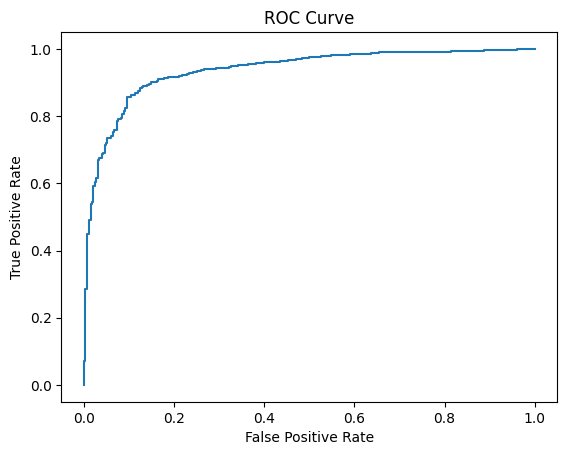

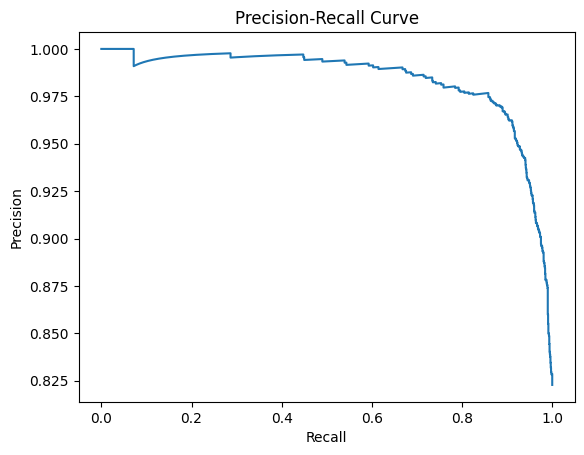

In [29]:
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
# Higher and more leftward the ROC, the better

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

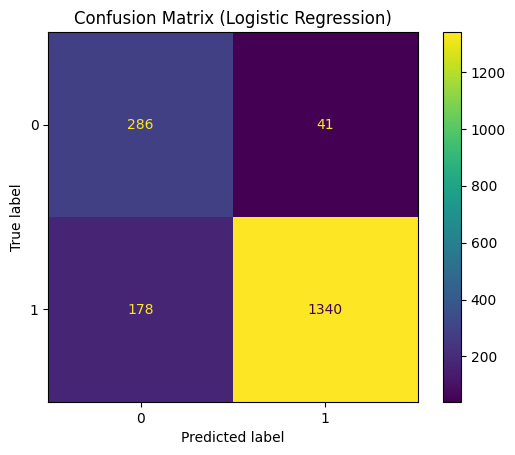

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title("Confusion Matrix (Logistic Regression)")
plt.savefig("static/confusion_matrix_logreg.png")  # Save

In [31]:
from sklearn.metrics import confusion_matrix

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic_best)
tn, fp, fn, tp = cm.ravel()

# Calculate FPR and FNR
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")

False Positive Rate (FPR): 0.1254
False Negative Rate (FNR): 0.1173


Relatively low FPR and FNR, indicating model is making relatively few mistakes in both directions, but could certainly be improved. Perhaps fitting a Random Forest Classifier will yield better results.

#### Feature Importance in Logistic Regression.
Classic case here is taking the absolute value of model coefficients. Larger absolute values indicate greater influence on the prediction. Plot top 10 features.

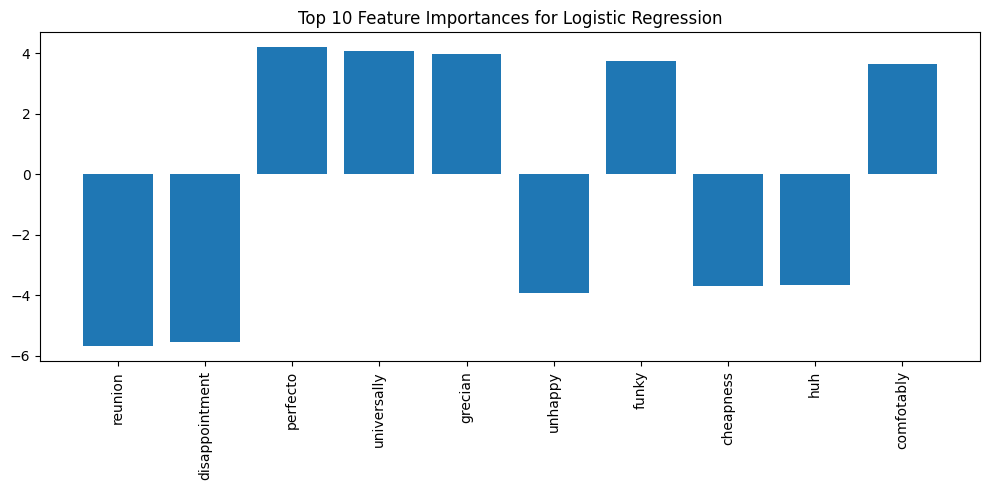

In [50]:
# Get the logistic regression step from  pipeline
logreg = model_best_logistic.named_steps['logisticregression']
coefs = logreg.coef_[0]

# Get feature names from feature_engineering pipeline
feature_names = []
for name, transformer, cols in feature_engineering.transformers_:
    if hasattr(transformer, 'steps'):
        last_step = transformer.steps[-1][1]
        if hasattr(last_step, 'get_feature_names_out'):
            try:
                names = last_step.get_feature_names_out(cols)
            except:
                names = cols
        else:
            names = cols
    elif hasattr(transformer, 'get_feature_names_out'):
        try:
            names = transformer.get_feature_names_out(cols)
        except:
            names = cols
    else:
        names = cols
    if hasattr(names, 'tolist'):
        names = names.tolist()
    feature_names.extend(names)

# Sort by absolute value of coefficients
indices = np.argsort(np.abs(coefs))[::-1]

top_n = 10  # Number of top features to plot

# Sort by absolute value for logistic regression
top_indices = indices[:top_n]

plt.figure(figsize=(10, 5))
plt.title("Top 10 Feature Importances for Logistic Regression")

plt.bar(range(top_n), coefs[indices][:top_n], align="center")
plt.xticks(range(top_n), np.array(feature_names)[top_indices], rotation=90)
plt.tight_layout()
plt.savefig("static/top_features_logreg.png")
plt.show()

- Reunion, disappointment, unhappy, cheapness and huh are all strong predictors against recommending the product. E.g., a value of -6 for reunion means, ceteris paribus, that the presence of "reunion" as a feature strongly decreases the log-odds of the positive class (i.e., the class being recommended).
- Perfecto, universally, grecian, funky and comfortably are all strong predictors for recommending the product. E.g., a value of 4 for perfecto means, ceteris paribus, that the presence of the "perfecto" feature strongly increases the log-odds of the positive class (i.e., the class being recommended).

### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

model_pipeline_forest = make_pipeline(
    feature_engineering,
    RandomForestClassifier(random_state=42),
)

model_pipeline_forest.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [34]:
y_pred_forest = model_pipeline_forest.predict(X_test)
accuracy_forest_pipeline = accuracy_score(y_test, y_pred_forest)
classification_report_forest = classification_report(y_test, y_pred_forest)

print("Accuracy:", accuracy_forest_pipeline)
print("Classification Report:\n", classification_report_forest)

c:\Users\gvdne\Desktop\Working folder\dsnd-pipelines-project\dsnd-pipelines\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\gvdne\Desktop\Working folder\dsnd-pipelines-project\dsnd-pipelines\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Accuracy: 0.8569105691056911
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.24      0.37       327
           1       0.86      0.99      0.92      1518

    accuracy                           0.86      1845
   macro avg       0.85      0.61      0.65      1845
weighted avg       0.85      0.86      0.82      1845



Compared to the baseline logistic regression, the random forest classifier achieves lower overall accuracy but has much lower recall for class 0 (non-recommendations), meaning it misses more non-recommended products. However, it maintains very high recall for class 1 (recommended), making it more likely to correctly identify recommended products but less balanced between the two classes.

### Fine-Tuning Random Forest Pipeline

In [35]:
from sklearn.model_selection import RandomizedSearchCV

my_distributions = dict(
    randomforestclassifier__n_estimators=[100, 200, 300, 500],           # Number of trees
    randomforestclassifier__max_features=['sqrt', 'log2', None],         # Number of features to consider at each split
    randomforestclassifier__max_depth=[None, 10, 20, 30, 50],            # Maximum tree depth
    randomforestclassifier__min_samples_split=[2, 5, 10],                # Minimum samples to split a node
    randomforestclassifier__min_samples_leaf=[1, 2, 4],                  # Minimum samples at a leaf node
    randomforestclassifier__class_weight=['balanced'],                   # Handle class imbalance
)

param_search = RandomizedSearchCV(
    estimator=model_pipeline_forest,                # Forest pipeline
    param_distributions=my_distributions,           # Chosen parameter grid
    n_iter=8,                                      # Try 8 random combinations (increase for more thorough search)
    cv=3,                                           # 3-fold cross-validation - just to speed up process.
    n_jobs=-1,                                      # Use all CPU cores
    refit=True,                                     # Refit on the best found parameters
    verbose=3,                                      # Detailed output
    random_state=42,                                # For reproducibility
)

param_search.fit(X_train, y_train)

# Retrieve the best parameters
param_search.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'randomforestclassifier__n_estimators': 200,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__max_features': 'log2',
 'randomforestclassifier__max_depth': 50,
 'randomforestclassifier__class_weight': 'balanced'}

In [36]:
model_best_forest = param_search.best_estimator_
model_best_forest

,steps,"[('columntransformer', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [37]:
# Save the model
joblib.dump(model_best_forest, 'best_model_random_forest.pkl')

['best_model_random_forest.pkl']

In [38]:
# Load the model
import joblib
model_best_forest = joblib.load('best_model_random_forest.pkl')

#### Best Random Forest Classifier Model Performance.

In [39]:
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, average_precision_score,
    roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
)

In [40]:
y_pred_forest = model_best_forest.predict(X_test)
accuracy_forest_pipeline_best = accuracy_score(y_test, y_pred_forest)
classification_report_forest_best = classification_report(y_test, y_pred_forest)

print("Accuracy:", accuracy_forest_pipeline_best)
print("Classification Report:\n", classification_report_forest_best)

c:\Users\gvdne\Desktop\Working folder\dsnd-pipelines-project\dsnd-pipelines\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\gvdne\Desktop\Working folder\dsnd-pipelines-project\dsnd-pipelines\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Accuracy: 0.8861788617886179
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.61      0.66       327
           1       0.92      0.95      0.93      1518

    accuracy                           0.89      1845
   macro avg       0.81      0.78      0.79      1845
weighted avg       0.88      0.89      0.88      1845



After tuning the random forest classifier with randomized search, the model’s performance improved compared to the baseline random forest classifier model. The tuned model achieved higher overall accuracy and, most importantly, became much better at identifying both recommended and not recommended products. Specifically, recall for the minority class (not recommended) increased dramatically from 0.24 to 0.61, while precision for the majority class (recommended) also improved. This resulted in a more balanced and fair model, reducing bias toward the majority class and making it more suitable for real-world applications where detecting both outcomes is important. This is represented by the increase in the F1-score for both classes.

The best logistic regression model achieved an accuracy of 0.88, with a recall of 0.87 for the minority class (not recommended) and 0.88 for the majority class (recommended). The tuned random forest classifier performed similarly, with an accuracy of 0.89 and a recall of 0.95 for the majority class. However, the recall for the minority class (not recommended) was lower at 0.61. Both models are well-balanced and effective at identifying both classes, but random forest exhibits a slightly lower weighted average F1-score of 0.88 versus 0.89 for logistic.

#### Random Forest Visualizations.

In [41]:
# Predictions and probabilities
y_pred_forest = model_best_forest.predict(X_test)
y_proba_forest = model_best_forest.predict_proba(X_test)[:, 1] # Get predicted probabilities of positive class

c:\Users\gvdne\Desktop\Working folder\dsnd-pipelines-project\dsnd-pipelines\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\gvdne\Desktop\Working folder\dsnd-pipelines-project\dsnd-pipelines\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\gvdne\Desktop\Working folder\dsnd-pipelines-project\dsnd-pipelines\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an 

In [48]:
# Save predictions for app
joblib.dump(y_pred_forest, 'y_pred_random.pkl')

['y_pred_random.pkl']

In [42]:
# ROC-AUC and PR-AUC
roc_auc = roc_auc_score(y_test, y_proba_forest)
pr_auc = average_precision_score(y_test, y_proba_forest)
print("ROC-AUC:", round(roc_auc, 4))
print("PR-AUC:", round(pr_auc, 4))

ROC-AUC: 0.9244
PR-AUC: 0.9823


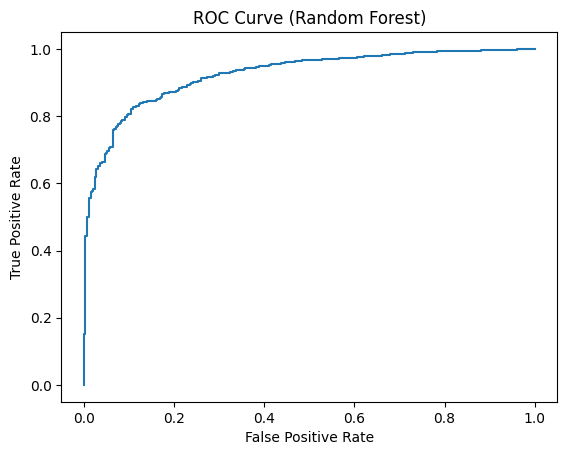

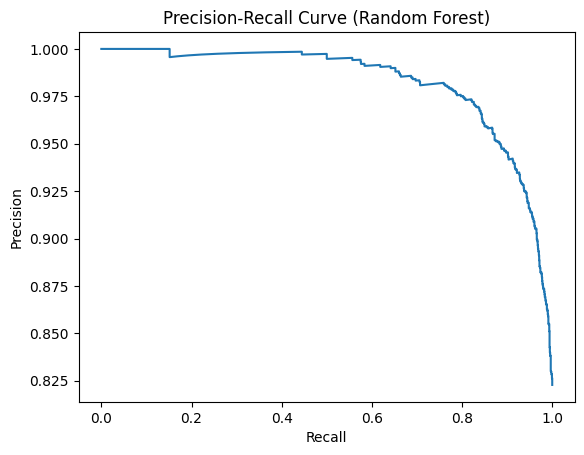

In [43]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_forest)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Random Forest)")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba_forest)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Random Forest)")
plt.show()

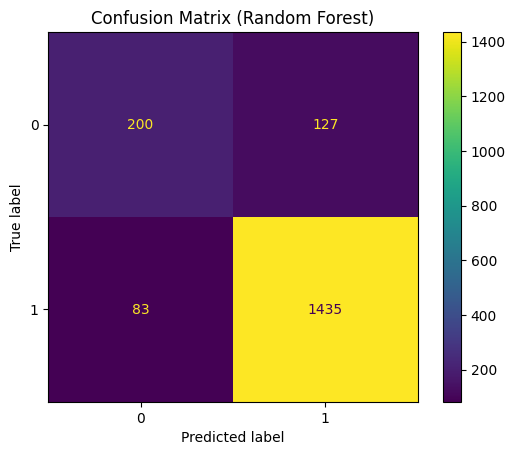

In [54]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_forest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix (Random Forest)")
plt.savefig("static/confusion_matrix_rf.png")
plt.show()

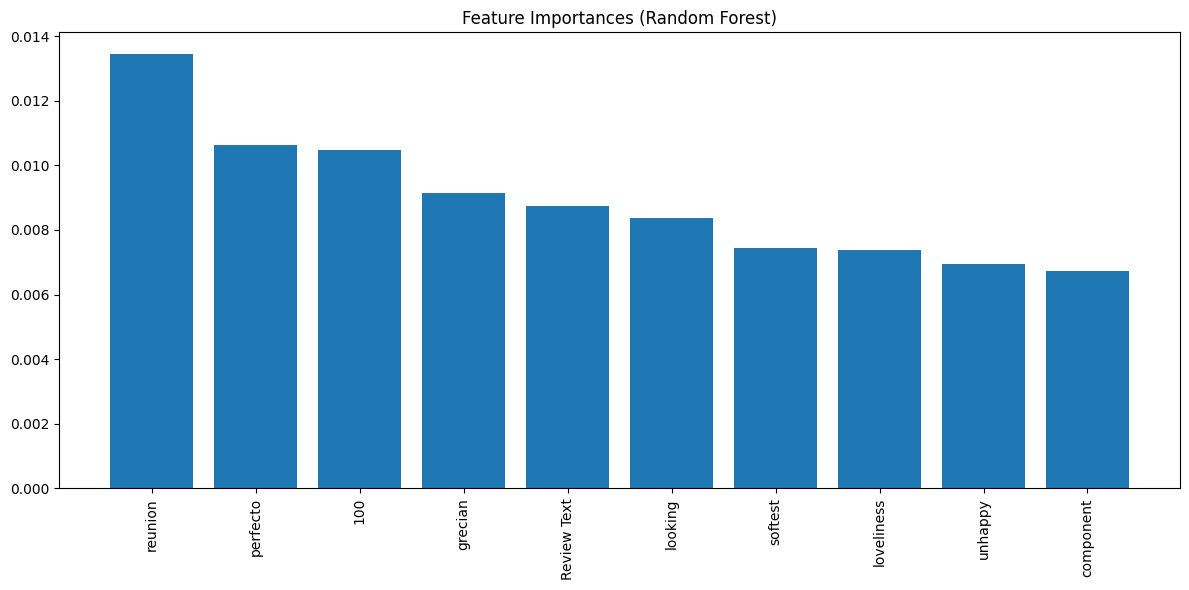

In [52]:

rf = model_best_forest.named_steps['randomforestclassifier']
importances = rf.feature_importances_

feature_names = []

for name, transformer, cols in feature_engineering.transformers_:
    # If transformer is a pipeline, get the last step
    if hasattr(transformer, 'steps'):
        last_step = transformer.steps[-1][1]
        if hasattr(last_step, 'get_feature_names_out'):
            try:
                names = last_step.get_feature_names_out(cols)
            except:
                names = cols
        else:
            names = cols
    elif hasattr(transformer, 'get_feature_names_out'):
        try:
            names = transformer.get_feature_names_out(cols)
        except:
            names = cols
    else:
        names = cols
    # If names is an Index, convert to list
    if hasattr(names, 'tolist'):
        names = names.tolist()
    feature_names.extend(names)

indices = np.argsort(importances)[::-1]
top_n = 10 # Select top 10 features
top_indices = indices[:top_n]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(top_n), importances[top_indices], align="center")
plt.xticks(range(top_n), np.array(feature_names)[top_indices], rotation=90)
plt.tight_layout()
plt.savefig("static/top_features_rf.png")
plt.show()

The graph above displays the top 10 features contributing to the model's decision making process. Feature importance here shows how a feature helps to reduce impurity (e.g., Gini or entropy) across all trees in the forest. As an example, a value of approximately 0.013 for "reunion" means that the feature contributes about 1.3% to the model's decision-making process.